In [4]:
import pandas as pd
import numpy as np

file_path = 'Backtest data.csv'  
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

def calculate_annualized_return(returns):
    """
    计算年化收益率
    参数:
    returns - 每日收益率序列

    返回:
    年化收益率
    """
    compounded_growth = (1 + returns).prod()
    n_periods = len(returns)
    annualized_return = compounded_growth ** (252/n_periods) - 1
    return annualized_return

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    """
    计算夏普比率
    参数:
    returns - 每日收益率序列
    risk_free_rate - 无风险利率，默认为0

    返回:
    夏普比率
    """
    annualized_return = calculate_annualized_return(returns)
    annualized_volatility = returns.std() * np.sqrt(252)
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility
    return sharpe_ratio

def calculate_sortino_ratio(returns, risk_free_rate=0):
    """
    计算索提诺比率
    参数:
    returns - 每日收益率序列
    risk_free_rate - 无风险利率，默认为0

    返回:
    索提诺比率
    """
    annualized_return = calculate_annualized_return(returns)
    negative_returns = returns[returns < returns.mean()]
    annualized_downside_deviation = negative_returns.std() * np.sqrt(252)
    sortino_ratio = (annualized_return - risk_free_rate) / annualized_downside_deviation
    return sortino_ratio

def calculate_information_ratio(returns, benchmark_returns):
    """
    计算信息比率
    参数:
    returns - 策略每日收益率序列
    benchmark_returns - 基准每日收益率序列

    返回:
    信息比率
    """
    excess_returns = returns - benchmark_returns
    annualized_excess_return = calculate_annualized_return(excess_returns)
    annualized_tracking_error = excess_returns.std() * np.sqrt(252)
    information_ratio = annualized_excess_return / annualized_tracking_error
    return information_ratio

def calculate_annualized_volatility(returns):
    """
    计算年化波动率
    参数:
    returns - 每日收益率序列

    返回:
    年化波动率
    """
    annualized_volatility = returns.std() * np.sqrt(252)
    return annualized_volatility

def calculate_beta(returns, benchmark_returns):
    """
    计算贝塔系数
    参数:
    returns - 策略每日收益率序列
    benchmark_returns - 基准每日收益率序列

    返回:
    贝塔系数
    """
    covariance = np.cov(returns, benchmark_returns)[0, 1]
    variance = np.var(benchmark_returns)
    beta = covariance / variance
    return beta

def calculate_alpha(returns, benchmark_returns, beta, risk_free_rate=0):
    """
    计算阿尔法系数
    参数:
    returns - 策略每日收益率序列
    benchmark_returns - 基准每日收益率序列
    beta - 策略的贝塔系数
    risk_free_rate - 无风险利率，默认为0

    返回:
    阿尔法系数
    """
    annualized_return_strategy = calculate_annualized_return(returns)
    annualized_return_benchmark = calculate_annualized_return(benchmark_returns)
    alpha = annualized_return_strategy - (risk_free_rate + beta * (annualized_return_benchmark - risk_free_rate))
    return alpha

def calculate_tracking_error(returns, benchmark_returns):
    """
    计算追踪误差
    参数:
    returns - 策略每日收益率序列
    benchmark_returns - 基准每日收益率序列

    返回:
    追踪误差
    """
    excess_returns = returns - benchmark_returns
    tracking_error = excess_returns.std() * np.sqrt(252)
    return tracking_error

def calculate_downside_risk(returns, risk_free_rate=0):
    """
    计算下行风险
    参数:
    returns - 每日收益率序列
    risk_free_rate - 无风险利率，默认为0

    返回:
    年化下行风险
    """
    downside_returns = np.where(returns < risk_free_rate, returns - risk_free_rate, 0)
    downside_deviation = np.std(downside_returns)
    annualized_downside_risk = downside_deviation * np.sqrt(252)
    return annualized_downside_risk

def calculate_max_drawdown(cumulative_returns):
    """
    计算最大回撤
    参数:
    cumulative_returns - 累计收益率序列

    返回:
    最大回撤
    """
    peak = cumulative_returns.max()
    trough = cumulative_returns[cumulative_returns.idxmax():].min()
    max_drawdown = (trough - peak) / peak
    return max_drawdown

annual_return_strategy = calculate_annualized_return(data['Strategy_Return'])
annual_return_benchmark = calculate_annualized_return(data['Benchmark_Return'])
sharpe_ratio_strategy = calculate_sharpe_ratio(data['Strategy_Return'])
sortino_ratio_strategy = calculate_sortino_ratio(data['Strategy_Return'])
information_ratio = calculate_information_ratio(data['Strategy_Return'], data['Benchmark_Return'])
volatility_strategy = calculate_annualized_volatility(data['Strategy_Return'])
beta_strategy = calculate_beta(data['Strategy_Return'], data['Benchmark_Return'])
alpha_strategy = calculate_alpha(data['Strategy_Return'], data['Benchmark_Return'], beta_strategy)
tracking_error_strategy = calculate_tracking_error(data['Strategy_Return'], data['Benchmark_Return'])
downside_risk_strategy = calculate_downside_risk(data['Strategy_Return'])
max_drawdown_strategy = calculate_max_drawdown(data['Strategy_Cumulative'])

print("Annual Return (Strategy):", annual_return_strategy)
print("Annual Benchmark Return:", annual_return_benchmark)
print("Sharpe Ratio (Strategy):", sharpe_ratio_strategy)
print("Sortino Ratio (Strategy):", sortino_ratio_strategy)
print("Information Ratio:", information_ratio)
print("Volatility (Strategy):", volatility_strategy)
print("Beta (Strategy):", beta_strategy)
print("Alpha (Strategy):", alpha_strategy)
print("Tracking Error (Strategy):", tracking_error_strategy)
print("Downside Risk (Strategy):", downside_risk_strategy)
print("Max Drawdown (Strategy):", max_drawdown_strategy)



Annual Return (Strategy): 0.16708590342270258
Annual Benchmark Return: 0.06789284398156603
Sharpe Ratio (Strategy): 0.5653561701428814
Sortino Ratio (Strategy): 0.9111746401274541
Information Ratio: -0.5506079375858633
Volatility (Strategy): 0.29554095673966957
Beta (Strategy): -0.24775840247185932
Alpha (Strategy): 0.18390692598684658
Tracking Error (Strategy): 1.489923874658073
Downside Risk (Strategy): 0.17262369116272813
Max Drawdown (Strategy): -0.7842213066421624


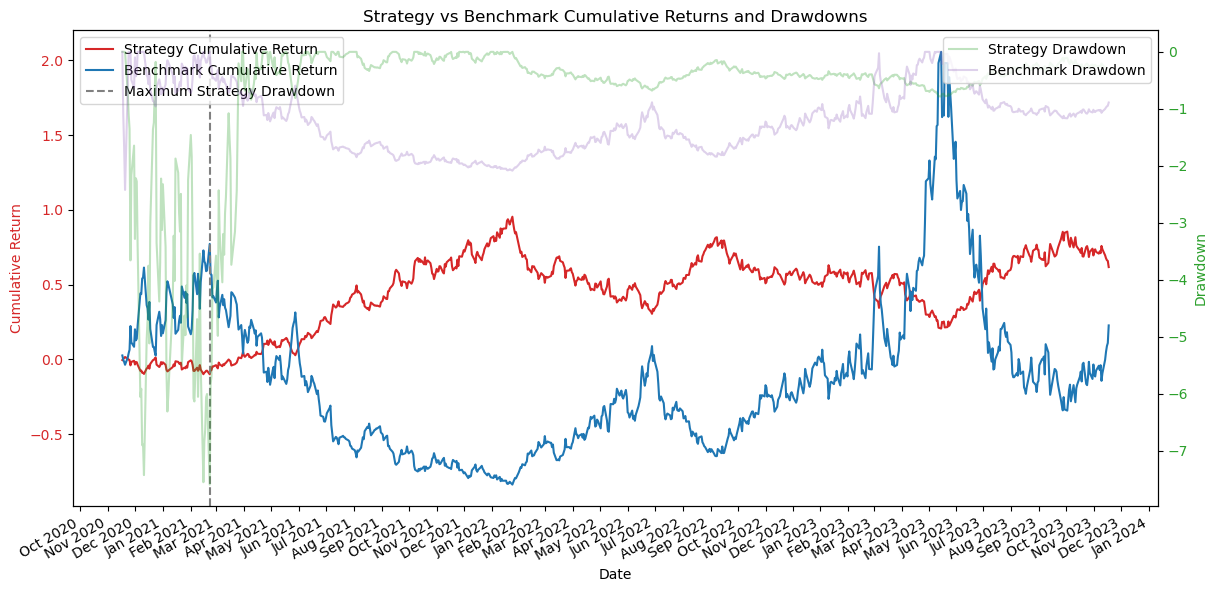

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 加载数据集
file_path = 'Backtest data.csv'
data = pd.read_csv(file_path)

# 将'Date'列转换为datetime类型，以便可以在图表中使用日期
data['Date'] = pd.to_datetime(data['Date'])

# 计算策略和基准的回撤
# 回撤是指从之前的高点下跌到低点的百分比，通常用于衡量投资风险
data['Strategy_Drawdown'] = (data['Strategy_Cumulative'] / data['Strategy_Cumulative'].cummax()) - 1
data['Benchmark_Drawdown'] = (data['Benchmark_Cumulative'] / data['Benchmark_Cumulative'].cummax()) - 1

# 找到策略最大回撤的日期
max_drawdown_date = data.loc[data['Strategy_Drawdown'].idxmin(), 'Date']

# 开始绘制图表
fig, ax1 = plt.subplots(figsize=(14, 7))

# 设置颜色为红色，用于策略的线条和标签
color = 'tab:red'
ax1.set_xlabel('日期')
ax1.set_ylabel('累积收益', color=color)
ax1.plot(data['Date'], data['Strategy_Cumulative'], label='策略累积收益', color=color)
ax1.plot(data['Date'], data['Benchmark_Cumulative'], label='基准累积收益', color='tab:blue')
ax1.tick_params(axis='y', labelcolor=color)
# 标记最大回撤日期
ax1.axvline(x=max_drawdown_date, color='grey', linestyle='--', label='策略最大回撤')
ax1.legend(loc='upper left')

# 创建第二个y轴，用于绘制回撤数据
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('回撤', color=color)
ax2.plot(data['Date'], data['Strategy_Drawdown'], label='策略回撤', color=color, alpha=0.3)
ax2.plot(data['Date'], data['Benchmark_Drawdown'], label='基准回撤', color='tab:purple', alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# 设置x轴的日期格式
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# 旋转和对齐x轴上的日期标签，使它们更易于阅读
fig.autofmt_xdate()

# 设置图表标题
plt.title('策略与基准的累积收益和回撤')

# 显示图表
plt.show()

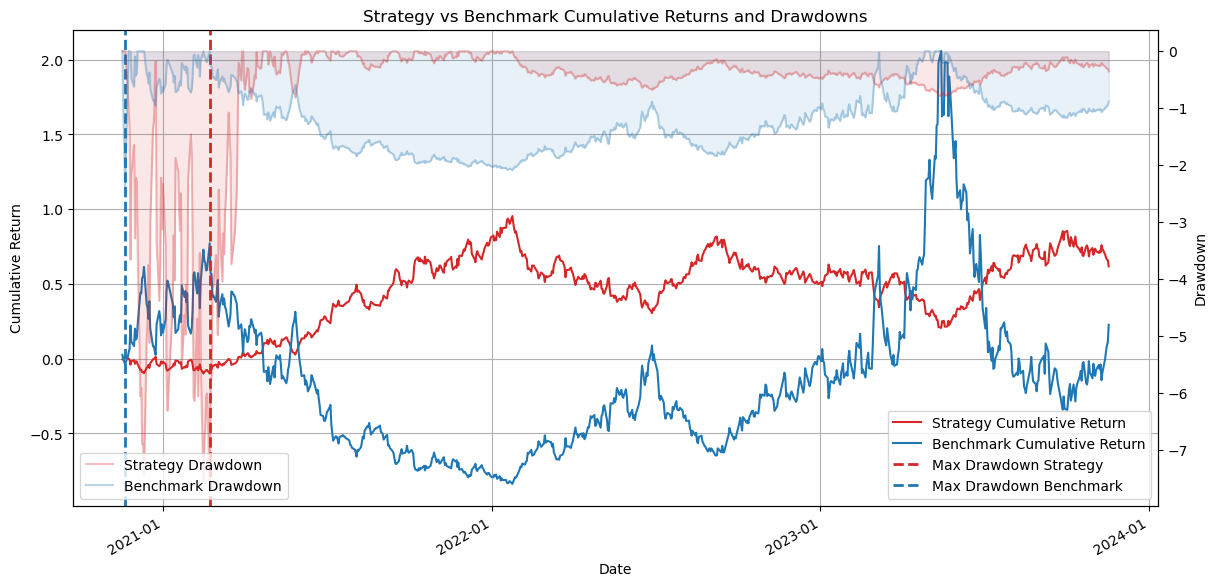

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 加载数据集
file_path = 'Backtest data.csv'
data = pd.read_csv(file_path)

# 将'Date'列转换为datetime类型
data['Date'] = pd.to_datetime(data['Date'])

# 计算策略和基准的回撤
data['Strategy_Drawdown'] = (data['Strategy_Cumulative'] / data['Strategy_Cumulative'].cummax()) - 1
data['Benchmark_Drawdown'] = (data['Benchmark_Cumulative'] / data['Benchmark_Cumulative'].cummax()) - 1

# 找到策略和基准的最大回撤日期
max_drawdown_date_strategy = data.loc[data['Strategy_Drawdown'].idxmin(), 'Date']
max_drawdown_date_benchmark = data.loc[data['Benchmark_Drawdown'].idxmin(), 'Date']

# 绘制累计收益并突出显示策略和基准的最大回撤区间
fig, ax1 = plt.subplots(figsize=(14, 7))

# 绘制策略和基准的累计收益
ax1.plot(data['Date'], data['Strategy_Cumulative'], label='策略累计收益', color='tab:red')
ax1.plot(data['Date'], data['Benchmark_Cumulative'], label='基准累计收益', color='tab:blue')

# 突出显示策略和基准的最大回撤日期
ax1.axvline(x=max_drawdown_date_strategy, color='tab:red', linestyle='--', linewidth=2, label='策略最大回撤')
ax1.axvline(x=max_drawdown_date_benchmark, color='tab:blue', linestyle='--', linewidth=2, label='基准最大回撤')

# 设置标签和标题
ax1.set_xlabel('日期')
ax1.set_ylabel('累计收益')
ax1.set_title('策略与基准的累计收益和回撤')

# 配置x轴的日期格式
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 旋转和对齐刻度标签，使它们看起来更好
fig.autofmt_xdate()

# 显示网格
ax1.grid(True)

# 显示图例
ax1.legend()

# 在右侧创建一个轴以显示回撤
ax2 = ax1.twinx()
ax2.plot(data['Date'], data['Strategy_Drawdown'], label='策略回撤', color='tab:red', alpha=0.3)
ax2.plot(data['Date'], data['Benchmark_Drawdown'], label='基准回撤', color='tab:blue', alpha=0.3)
ax2.fill_between(data['Date'], data['Strategy_Drawdown'], 0, alpha=0.1, color='tab:red')
ax2.fill_between(data['Date'], data['Benchmark_Drawdown'], 0, alpha=0.1, color='tab:blue')
ax2.set_ylabel('回撤')
ax2.legend(loc='lower left')

# 显示绘制的图表
plt.show()